此练习来自kesci.com <br>
[这十套练习，教你如何使用Pandas做数据分析](https://www.kesci.com/home/project/59e77a636d213335f38daec2)

In [49]:
import pandas as pd
import numpy as np

# chipotle 快餐数据(基本操作)

## 看基本数据

In [61]:
chipo = pd.read_csv("chipotle.tsv", sep="\t")

In [4]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [6]:
chipo.shape

(4622, 5)

In [8]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [9]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

## 被下单最多的商品(item)?

as_index=False 意思是不让item_name变成index.
agg里面的字典表示你可以对每一列用不同的函数

In [25]:
c = chipo.groupby(['item_name'],as_index=False).agg({'quantity':sum})
c.sort_values(['quantity'],ascending=False,inplace=True)
c.head()

,item_name,quantity
17,Chicken Bowl,761
18,Chicken Burrito,591
25,Chips and Guacamole,506
39,Steak Burrito,386
10,Canned Soft Drink,351


## 在item_name这一列中，一共有多少种商品被下单？¶

In [30]:
chipo['item_name'].nunique()

50

## 步骤11 在choice_description中，下单次数最多的商品是什么？

In [35]:
temp = chipo.groupby(['choice_description'],as_index=False).agg({'quantity':sum})
temp.sort_values(by='quantity',inplace=True,ascending=False)
temp

,choice_description,quantity
15,[Diet Coke],159
14,[Coke],143
583,[Sprite],89
256,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",49
257,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",42
...,...,...
496,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",1
499,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",1
502,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",1
504,"[Roasted Chili Corn Salsa, [Guacamole, Sour Cr...",1


## 一共有多少商品被下单？

In [36]:
chipo.loc[:, 'quantity'].sum()

4972

## 将item_price转换为浮点数

In [70]:
chipo['item_price'] = chipo.loc[:, 'item_price'].apply(lambda x: x[1:]).astype(np.float64)

In [72]:
chipo['item_price']

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

## 在该数据集对应的时期内，收入(revenue)是多少

In [91]:
chipo['sum_earn'] = chipo['quantity']*chipo['item_price']

In [92]:
chipo['sum_earn'].sum()

39237.02

## 在该数据集对应的时期内，一共有多少订单？

In [86]:
chipo['order_id'].nunique()

1834

## 每一单(order)对应的平均总价是多少？

In [120]:
chipo.groupby('order_id').agg({'sum_earn':sum}).mean()

sum_earn    21.394231
dtype: float64

## 一共有多少种不同的商品被售出

In [122]:
chipo['item_name'].nunique()

50

# 探索2012欧洲杯数据(数据过滤排序)

In [124]:
euro12 = pd.read_csv('Euro2012_stats.csv')

In [125]:
euro12.head(5)

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [132]:
euro12['Goals']

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

## 有多少球队参与了2012欧洲杯？

In [133]:
euro12['Team'].nunique()

16

## 该数据集中一共有多少列(columns)?

In [134]:
euro12.shape[1]

35

## 将数据集中的列Team, Yellow Cards和Red Cards单独存为一个名叫discipline的数据框

In [137]:
discipline = euro12.loc[:,['Team', 'Yellow Cards', 'Red Cards']]

In [139]:
discipline.head()

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0


## 对数据框discipline按照先Red Cards再Yellow Cards进行排序

In [143]:
discipline.sort_values(by=['Red Cards', 'Yellow Cards'])

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


## 计算每个球队拿到的黄牌数的平均值

In [155]:
discipline.groupby(['Team']).agg({'Yellow Cards':np.mean})

,Yellow Cards
Team,
Croatia,9
Czech Republic,7
Denmark,4
England,5
France,6
Germany,4
Greece,9
Italy,16
Netherlands,5


## 找到进球数Goals超过6的球队数据

In [159]:
euro12.loc[euro12.Goals>6, :]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


## 选取以字母G开头的球队数据

In [181]:
%timeit euro12.loc[euro12.loc[:, "Team"].apply(lambda x: x.startswith("G"))]

631 µs ± 7.93 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [182]:
%timeit euro12[euro12.Team.str.startswith('G')]

524 µs ± 3.51 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## 选取前7列

In [185]:
euro12.iloc[:, 0:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


## 选取除了最后3列之外的全部列

In [186]:
euro12.iloc[:, :-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


## 找到英格兰(England)、意大利(Italy)和俄罗斯(Russia)的射正率(Shooting Accuracy)

In [191]:
euro12[euro12.Team.isin(['England', 'Italy', 'Russia'])].loc[:,["Team", "Shooting Accuracy"]]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


In [156]:
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [144]:
discipline.head()

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0


# 探索酒类消费数据(数据分类统计)

In [2]:
drinks = pd.read_csv('drinks.csv')

In [3]:
drinks.head(5)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [4]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [5]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
continent                       170 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


## 哪个大陆(continent)平均消耗的啤酒(beer)更多？

In [6]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [13]:
drinks.groupby('continent').agg({'beer_servings':np.mean}).sort_values('beer_servings', ascending=False)

,beer_servings
continent,
EU,193.777778
SA,175.083333
OC,89.687500
AF,61.471698
AS,37.045455


## 打印出每个大陆(continent)的红酒消耗(wine_servings)的描述性统计值

In [22]:
drinks.loc[:, ['continent','wine_servings']].groupby('continent').describe()

wine_servings                                                   \
                  count        mean        std  min   25%    50%     75%   
continent                                                                  
AF                 53.0   16.264151  38.846419  0.0   1.0    2.0   13.00   
AS                 44.0    9.068182  21.667034  0.0   0.0    1.0    8.00   
EU                 45.0  142.222222  97.421738  0.0  59.0  128.0  195.00   
OC                 16.0   35.625000  64.555790  0.0   1.0    8.5   23.25   
SA                 12.0   62.416667  88.620189  1.0   3.0   12.0   98.50   

                  
             max  
continent         
AF         233.0  
AS         123.0  
EU         370.0  
OC         212.0  
SA         221.0

In [21]:
%timeit drinks.loc[:, ['continent','wine_servings']].groupby('continent').describe()

21 ms ± 577 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [23]:
drinks.groupby('continent').wine_servings.describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
AF,53.0,16.264151,38.846419,0.0,1.0,2.0,13.00,233.0
AS,44.0,9.068182,21.667034,0.0,0.0,1.0,8.00,123.0
EU,45.0,142.222222,97.421738,0.0,59.0,128.0,195.00,370.0
OC,16.0,35.625000,64.555790,0.0,1.0,8.5,23.25,212.0
SA,12.0,62.416667,88.620189,1.0,3.0,12.0,98.50,221.0


In [20]:
%timeit drinks.groupby('continent').wine_servings.describe()

9.78 ms ± 292 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [30]:
drinks.groupby('continent').agg({'wine_servings': 'describe'})

wine_servings                                                   \
                  count        mean        std  min   25%    50%     75%   
continent                                                                  
AF                 53.0   16.264151  38.846419  0.0   1.0    2.0   13.00   
AS                 44.0    9.068182  21.667034  0.0   0.0    1.0    8.00   
EU                 45.0  142.222222  97.421738  0.0  59.0  128.0  195.00   
OC                 16.0   35.625000  64.555790  0.0   1.0    8.5   23.25   
SA                 12.0   62.416667  88.620189  1.0   3.0   12.0   98.50   

                  
             max  
continent         
AF         233.0  
AS         123.0  
EU         370.0  
OC         212.0  
SA         221.0

In [31]:
%timeit drinks.groupby('continent').agg({'wine_servings': 'describe'})

10.6 ms ± 80.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## 打印出每个大陆每种酒类别的消耗平均值

In [32]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [33]:
drinks.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


## 打印出每个大陆每种酒类别的消耗中位数

In [34]:
drinks.groupby('continent').median()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,32.0,3.0,2.0,2.30
AS,17.5,16.0,1.0,1.20
EU,219.0,122.0,128.0,10.00
OC,52.5,37.0,8.5,1.75
SA,162.5,108.5,12.0,6.85


## 打印出每个大陆对spirit饮品消耗的平均值，最大值和最小值¶

In [35]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [38]:
drinks.groupby('continent').agg({'spirit_servings':['mean','min','max']})

spirit_servings         
                     mean min  max
continent                         
AF              16.339623   0  152
AS              60.840909   0  326
EU             132.555556   0  373
OC              58.437500   0  254
SA             114.750000  25  302

# 探索1960 - 2014 美国犯罪数据(apply函数)

In [30]:
crime = pd.read_csv('US_Crime_Rates_1960_2014.csv')

In [31]:
crime.head()

,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
3,1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
4,1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


In [32]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 12 columns):
Year                  55 non-null int64
Population            55 non-null int64
Total                 55 non-null int64
Violent               55 non-null int64
Property              55 non-null int64
Murder                55 non-null int64
Forcible_Rape         55 non-null int64
Robbery               55 non-null int64
Aggravated_assault    55 non-null int64
Burglary              55 non-null int64
Larceny_Theft         55 non-null int64
Vehicle_Theft         55 non-null int64
dtypes: int64(12)
memory usage: 5.3 KB


In [33]:
crime.describe()

,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
count,55.00000,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,55.000000,55.000000,55.000000,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01
mean,1987.00000,2.461556e+08,1.060315e+07,1.188806e+06,9.412499e+06,17317.236364,72714.800000,416449.890909,6.811818e+05,2.424017e+06,5.959947e+06,1.028614e+06
std,16.02082,4.166216e+07,3.175931e+06,4.597107e+05,2.738512e+06,4267.442664,28278.006893,150506.403782,2.960255e+05,7.259004e+05,1.846401e+06,3.455693e+05
min,1960.00000,1.793232e+08,3.384200e+06,2.884600e+05,3.095700e+06,8530.000000,17190.000000,106670.000000,1.543200e+05,9.121000e+05,1.855400e+06,3.282000e+05
25%,1973.50000,2.106215e+08,9.096958e+06,9.253150e+05,8.060014e+06,14819.000000,53400.000000,354911.500000,4.384300e+05,2.105336e+06,4.843350e+06,7.896260e+05
50%,1987.00000,2.422829e+08,1.140151e+07,1.322390e+06,1.018259e+07,17030.000000,84230.000000,423557.000000,7.412910e+05,2.329950e+06,6.591900e+06,1.032200e+06
75%,2000.50000,2.833697e+08,1.308449e+07,1.432762e+06,1.160509e+07,20561.500000,92930.000000,512137.000000,9.002150e+05,3.073600e+06,7.168450e+06,1.239302e+06
max,2014.00000,3.188571e+08,1.487290e+07,1.932270e+06,1.296110e+07,24700.000000,109060.000000,687730.000000,1.135610e+06,3.795200e+06,8.142200e+06,1.661700e+06


## 将Year的数据类型转换为 datetime64

In [34]:
crime.Year = pd.to_datetime(crime.Year, format='%Y')
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 12 columns):
Year                  55 non-null datetime64[ns]
Population            55 non-null int64
Total                 55 non-null int64
Violent               55 non-null int64
Property              55 non-null int64
Murder                55 non-null int64
Forcible_Rape         55 non-null int64
Robbery               55 non-null int64
Aggravated_assault    55 non-null int64
Burglary              55 non-null int64
Larceny_Theft         55 non-null int64
Vehicle_Theft         55 non-null int64
dtypes: datetime64[ns](1), int64(11)
memory usage: 5.3 KB


## 将列Year设置为数据框的索引

In [35]:
crime.set_index('Year', inplace=True)
crime.head(5)

,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,,
1960-01-01,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961-01-01,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962-01-01,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
1963-01-01,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
1964-01-01,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


删除名为Total的列

In [36]:
crime.drop(['Total'],axis=1,inplace=True)

In [37]:
crime.head()

,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,
1960-01-01,179323175,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961-01-01,182992000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962-01-01,185771000,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
1963-01-01,188483000,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
1964-01-01,191141000,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


按照Year对数据框进行10年的采样并求和

In [41]:
crimes = crime.resample('10AS').sum()
# 用resample去得到“Population”列的最大值
population = crime['Population'].resample('10AS').max()

# 更新 "Population" 
crimes['Population'] = population

crimes

,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,
1960-01-01,201385000,4134930,45160900,106180,236720,1633510,2158520,13321100,26547700,5292100
1970-01-01,220099000,9607930,91383800,192230,554570,4159020,4702120,28486000,53157800,9739900
1980-01-01,248239000,14074328,117048900,206439,865639,5383109,7619130,33073494,72040253,11935411
1990-01-01,272690813,17527048,119053499,211664,998827,5748930,10568963,26750015,77679366,14624418
2000-01-01,307006550,13968056,100944369,163068,922499,4230366,8652124,21565176,67970291,11412834
2010-01-01,318857056,6072017,44095950,72867,421059,1749809,3764142,10125170,30401698,3569080


## 何时是美国历史上生存最危险的年代？

In [47]:
crime.idxmax()

Population           2014-01-01
Violent              1992-01-01
Property             1991-01-01
Murder               1991-01-01
Forcible_Rape        1992-01-01
Robbery              1991-01-01
Aggravated_assault   1993-01-01
Burglary             1980-01-01
Larceny_Theft        1991-01-01
Vehicle_Theft        1991-01-01
dtype: datetime64[ns]

# 探索虚拟姓名数据(数据整合)

In [50]:
# 运行以下代码
raw_data_1 = {
        'subject_id': ['1', '2', '3', '4', '5'],
        'first_name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'], 
        'last_name': ['Anderson', 'Ackerman', 'Ali', 'Aoni', 'Atiches']}

raw_data_2 = {
        'subject_id': ['4', '5', '6', '7', '8'],
        'first_name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'], 
        'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']}

raw_data_3 = {
        'subject_id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
        'test_id': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}


In [51]:
# 运行以下代码
data1 = pd.DataFrame(raw_data_1, columns = ['subject_id', 'first_name', 'last_name'])
data2 = pd.DataFrame(raw_data_2, columns = ['subject_id', 'first_name', 'last_name'])
data3 = pd.DataFrame(raw_data_3, columns = ['subject_id','test_id'])

In [54]:
data1

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches


In [55]:
data2

,subject_id,first_name,last_name
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


In [56]:
data3

,subject_id,test_id
0,1,51
1,2,15
2,3,15
3,4,61
4,5,16
5,7,14
6,8,15
7,9,1
8,10,61
9,11,16


## 将data1和data2两个数据框按照行的维度进行合并，命名为all_data

In [58]:
all_data = pd.concat([data1, data2], axis=0)
all_data

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


将data1和data2两个数据框按照列的维度进行合并，命名为all_data_col

In [60]:
all_data_col = pd.concat([data1, data2], axis=1)
all_data_col

,subject_id,first_name,last_name,subject_id,first_name,last_name
0,1,Alex,Anderson,4,Billy,Bonder
1,2,Amy,Ackerman,5,Brian,Black
2,3,Allen,Ali,6,Bran,Balwner
3,4,Alice,Aoni,7,Bryce,Brice
4,5,Ayoung,Atiches,8,Betty,Btisan


## 按照subject_id的值对all_data和data3作合并

In [84]:
%%time
pd.merge(all_data, data3, on='subject_id')

Wall time: 3.07 ms


,subject_id,first_name,last_name,test_id
0,1,Alex,Anderson,51
1,2,Amy,Ackerman,15
2,3,Allen,Ali,15
3,4,Alice,Aoni,61
4,4,Billy,Bonder,61
5,5,Ayoung,Atiches,16
6,5,Brian,Black,16
7,7,Bryce,Brice,14
8,8,Betty,Btisan,15


In [83]:
%%time
all_data.join(data3.set_index('subject_id'),on='subject_id')

Wall time: 3.38 ms


,subject_id,first_name,last_name,test_id
0,1,Alex,Anderson,51.0
1,2,Amy,Ackerman,15.0
2,3,Allen,Ali,15.0
3,4,Alice,Aoni,61.0
4,5,Ayoung,Atiches,16.0
0,4,Billy,Bonder,61.0
1,5,Brian,Black,16.0
2,6,Bran,Balwner,NaN
3,7,Bryce,Brice,14.0
4,8,Betty,Btisan,15.0


## 对data1和data2按照subject_id作连接

In [95]:
pd.concat([data1, data2])

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


In [93]:
pd.merge(data1, data2, on='subject_id', how='outer')

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,1,Alex,Anderson,NaN,NaN
1,2,Amy,Ackerman,NaN,NaN
2,3,Allen,Ali,NaN,NaN
3,4,Alice,Aoni,Billy,Bonder
4,5,Ayoung,Atiches,Brian,Black
5,6,NaN,NaN,Bran,Balwner
6,7,NaN,NaN,Bryce,Brice
7,8,NaN,NaN,Betty,Btisan


# 探索风速数据(描述统计)

In [99]:
import datetime

In [135]:
path6 = "wind.data"
data = pd.read_table(path6, sep = "\s+", parse_dates = [[0,1,2]]) 

In [101]:
data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [103]:
data.describe()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
count,6568.000000,6571.000000,6572.000000,6569.000000,6572.000000,6574.000000,6571.000000,6572.000000,6571.000000,6573.000000,6574.000000,6570.000000
mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
25%,8.120000,6.670000,8.000000,3.580000,6.750000,4.000000,6.000000,5.090000,5.370000,5.330000,8.710000,10.710000
50%,11.710000,10.170000,10.920000,5.750000,9.960000,6.830000,9.210000,8.080000,8.170000,8.290000,12.500000,15.000000
75%,15.920000,14.040000,14.670000,8.420000,13.540000,9.670000,12.960000,11.420000,11.190000,11.630000,16.880000,19.830000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000


In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 13 columns):
Yr_Mo_Dy    6574 non-null datetime64[ns]
RPT         6568 non-null float64
VAL         6571 non-null float64
ROS         6572 non-null float64
KIL         6569 non-null float64
SHA         6572 non-null float64
BIR         6574 non-null float64
DUB         6571 non-null float64
CLA         6572 non-null float64
MUL         6571 non-null float64
CLO         6573 non-null float64
BEL         6574 non-null float64
MAL         6570 non-null float64
dtypes: datetime64[ns](1), float64(12)
memory usage: 667.8 KB


## 2061年？我们真的有这一年的数据？创建一个函数并用它去修复这个bug

In [136]:
def fix_year(date):
    new_year = date.year - 100 if date.year> 1989 else date.year
    return datetime.date(new_year, date.month, date.day)

In [137]:
data['Yr_Mo_Dy'] = data['Yr_Mo_Dy'].apply(fix_year)

In [138]:
data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


## 将日期设为索引，注意数据类型，应该是datetime64[ns]

In [149]:
%%time
data['Yr_Mo_Dy']= pd.to_datetime(data["Yr_Mo_Dy"])
data = data.set_index('Yr_Mo_Dy')
data.head()

Wall time: 3.41 ms


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


## 对应每一个location，一共有多少数据值缺失

In [156]:
data.isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

## 对应每一个location，一共有多少完整的数据值

In [159]:
data.count()

RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

In [160]:
#官方答案
data.shape[0] - data.isnull().sum()

RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

## 对于全体数据，计算风速的平均值

In [164]:
data.mean().mean()

10.227982360836924

 ## 创建一个名为loc_stats的数据框去计算并存储每个location的风速最小值，最大值，平均值和标准差

In [167]:
loc_states = pd.DataFrame()

In [169]:
loc_states['min'] = data.min()
loc_states['max'] = data.max()
loc_states['mean'] = data.mean()
loc_states['std'] = data.std()

In [170]:
loc_states

,min,max,mean,std
RPT,0.67,35.80,12.362987,5.618413
VAL,0.21,33.37,10.644314,5.267356
ROS,1.50,33.84,11.660526,5.008450
KIL,0.00,28.46,6.306468,3.605811
SHA,0.13,37.54,10.455834,4.936125
BIR,0.00,26.16,7.092254,3.968683
DUB,0.00,30.37,9.797343,4.977555
CLA,0.00,31.08,8.495053,4.499449
MUL,0.00,25.88,8.493590,4.166872
CLO,0.04,28.21,8.707332,4.503954


## 创建一个名为day_stats的数据框去计算并存储所有location的风速最小值，最大值，平均值和标准差

In [204]:
%%time
day_stats = pd.Series()
data_stack = data.stack()
day_stats['min'] = data_stack.min() # min
day_stats['max'] = data_stack.max() # max 
day_stats['mean'] = data_stack.mean() # mean
day_stats['std'] = data_stack.std(ddof=1) # standard deviations

day_stats.head()

Wall time: 11 ms


min      0.000000
max     42.540000
mean    10.227884
std      5.603872
dtype: float64

In [181]:
# 官方答案
# create the dataframe
day_stats = pd.DataFrame()

# this time we determine axis equals to one so it gets each row.
day_stats['min'] = data.min(axis = 1) # min
day_stats['max'] = data.max(axis = 1) # max 
day_stats['mean'] = data.mean(axis = 1) # mean
day_stats['std'] = data.std(axis = 1) # standard deviations

day_stats.head()

,min,max,mean,std
Yr_Mo_Dy,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356


## 对于每一个location，计算一月份的平均风速¶
注意，1961年的1月和1962年的1月应该区别对待

In [206]:
data['date'] = data.index
# creates a column for each value from date
data['month'] = data['date'].apply(lambda date: date.month)
data['year'] = data['date'].apply(lambda date: date.year)
data['day'] = data['date'].apply(lambda date: date.day)

In [211]:
# gets all value from the month 1 and assign to janyary_winds
january_winds = data[data['month'] == 1]

In [214]:
january_winds.loc[:,'RPT':"MAL"].mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

## 对于数据记录按照年为频率取样

In [234]:
%%time
data.query('month == 1 and day == 1')

Wall time: 3.38 ms


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,date,month,year,day
Yr_Mo_Dy,,,,,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-01-01,1,1961,1
1962-01-01,9.29,3.42,11.54,3.50,2.21,1.96,10.41,2.79,3.54,5.17,4.38,7.92,1962-01-01,1,1962,1
1963-01-01,15.59,13.62,19.79,8.38,12.25,10.00,23.45,15.71,13.59,14.37,17.58,34.13,1963-01-01,1,1963,1
1964-01-01,25.80,22.13,18.21,13.25,21.29,14.79,14.12,19.58,13.25,16.75,28.96,21.00,1964-01-01,1,1964,1
1965-01-01,9.54,11.92,9.00,4.38,6.08,5.21,10.25,6.08,5.71,8.63,12.04,17.41,1965-01-01,1,1965,1
1966-01-01,22.04,21.50,17.08,12.75,22.17,15.59,21.79,18.12,16.66,17.83,28.33,23.79,1966-01-01,1,1966,1
1967-01-01,6.46,4.46,6.50,3.21,6.67,3.79,11.38,3.83,7.71,9.08,10.67,20.91,1967-01-01,1,1967,1
1968-01-01,30.04,17.88,16.25,16.25,21.79,12.54,18.16,16.62,18.75,17.62,22.25,27.29,1968-01-01,1,1968,1
1969-01-01,6.13,1.63,5.41,1.08,2.54,1.00,8.50,2.42,4.58,6.34,9.17,16.71,1969-01-01,1,1969,1


In [235]:
%%time
data[(data['month']==1) & (data['day']==1)]

Wall time: 997 µs


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,date,month,year,day
Yr_Mo_Dy,,,,,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-01-01,1,1961,1
1962-01-01,9.29,3.42,11.54,3.50,2.21,1.96,10.41,2.79,3.54,5.17,4.38,7.92,1962-01-01,1,1962,1
1963-01-01,15.59,13.62,19.79,8.38,12.25,10.00,23.45,15.71,13.59,14.37,17.58,34.13,1963-01-01,1,1963,1
1964-01-01,25.80,22.13,18.21,13.25,21.29,14.79,14.12,19.58,13.25,16.75,28.96,21.00,1964-01-01,1,1964,1
1965-01-01,9.54,11.92,9.00,4.38,6.08,5.21,10.25,6.08,5.71,8.63,12.04,17.41,1965-01-01,1,1965,1
1966-01-01,22.04,21.50,17.08,12.75,22.17,15.59,21.79,18.12,16.66,17.83,28.33,23.79,1966-01-01,1,1966,1
1967-01-01,6.46,4.46,6.50,3.21,6.67,3.79,11.38,3.83,7.71,9.08,10.67,20.91,1967-01-01,1,1967,1
1968-01-01,30.04,17.88,16.25,16.25,21.79,12.54,18.16,16.62,18.75,17.62,22.25,27.29,1968-01-01,1,1968,1
1969-01-01,6.13,1.63,5.41,1.08,2.54,1.00,8.50,2.42,4.58,6.34,9.17,16.71,1969-01-01,1,1969,1


## 对于数据记录按照月为频率取样

In [237]:
data[data["day"]==1]

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,date,month,year,day
Yr_Mo_Dy,,,,,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-01-01,1,1961,1
1961-02-01,14.25,15.12,9.04,5.88,12.08,7.17,10.17,3.63,6.50,5.50,9.17,8.00,1961-02-01,2,1961,1
1961-03-01,12.67,13.13,11.79,6.42,9.79,8.54,10.25,13.29,NaN,12.21,20.62,NaN,1961-03-01,3,1961,1
1961-04-01,8.38,6.34,8.33,6.75,9.33,9.54,11.67,8.21,11.21,6.46,11.96,7.17,1961-04-01,4,1961,1
1961-05-01,15.87,13.88,15.37,9.79,13.46,10.17,9.96,14.04,9.75,9.92,18.63,11.12,1961-05-01,5,1961,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-01,19.33,15.09,20.17,8.83,12.62,10.41,9.33,12.33,9.50,9.92,15.75,18.00,1978-08-01,8,1978,1
1978-09-01,8.42,6.13,9.87,5.25,3.21,5.71,7.25,3.50,7.33,6.50,7.62,15.96,1978-09-01,9,1978,1
1978-10-01,9.50,6.83,10.50,3.88,6.13,4.58,4.21,6.50,6.38,6.54,10.63,14.09,1978-10-01,10,1978,1


# 探索泰坦尼克灾难数据(数据可视化)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
path7 = 'train.csv'  # train.csv

In [3]:
titanic = pd.read_csv(path7)

In [5]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##  将PassengerId设置为索引

In [7]:
titanic.set_index('PassengerId').head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 绘制一个展示男女乘客比例的扇形图

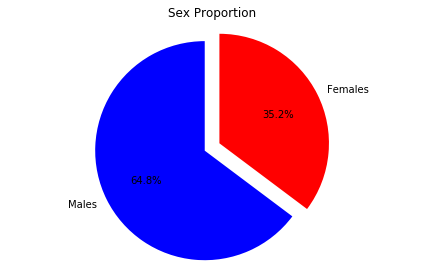

In [9]:
# 运行以下代码
# sum the instances of males and females
males = (titanic['Sex'] == 'male').sum()
females = (titanic['Sex'] == 'female').sum()

# put them into a list called proportions
proportions = [males, females]

# Create a pie chart
plt.pie(
    # using proportions
    proportions,
    
    # with the labels being officer names
    labels = ['Males', 'Females'],
    
    # with no shadows
    shadow = False,
    
    # with colors
    colors = ['blue','red'],
    
    # with one slide exploded out
    explode = (0.15 , 0),
    
    # with the start angle at 90%
    startangle = 90,
    
    # with the percent listed as a fraction
    autopct = '%1.1f%%'
    )

# View the plot drop above
plt.axis('equal')

# Set labels
plt.title("Sex Proportion")

# View the plot
plt.tight_layout()
plt.show()

## 绘制一个展示船票Fare, 与乘客年龄和性别的散点图

(-5, 85)

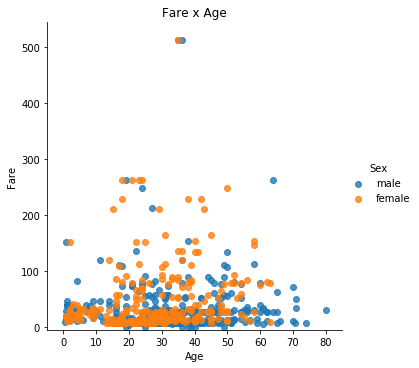

In [10]:
# 运行以下代码
# creates the plot using
lm = sns.lmplot(x = 'Age', y = 'Fare', data = titanic, hue = 'Sex', fit_reg=False)

# set title
lm.set(title = 'Fare x Age')

# get the axes object and tweak it
axes = lm.axes
axes[0,0].set_ylim(-5,)
axes[0,0].set_xlim(-5,85)

## 有多少人生还

In [12]:
titanic.Survived.sum()

342

## 绘制一个展示船票价格的直方图

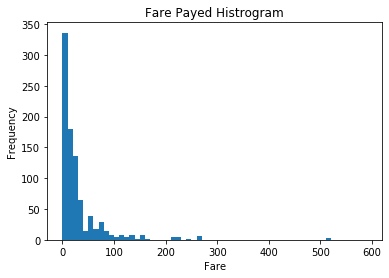

In [13]:
# 运行以下代码
# sort the values from the top to the least value and slice the first 5 items
df = titanic.Fare.sort_values(ascending = False)
df

# create bins interval using numpy
binsVal = np.arange(0,600,10)
binsVal

# create the plot
plt.hist(df, bins = binsVal)

# Set the title and labels
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Fare Payed Histrogram')

# show the plot
plt.show()

# 探索Pokemon数据(创建数据框)

In [14]:
raw_data = {"name": ['Bulbasaur', 'Charmander','Squirtle','Caterpie'],
            "evolution": ['Ivysaur','Charmeleon','Wartortle','Metapod'],
            "type": ['grass', 'fire', 'water', 'bug'],
            "hp": [45, 39, 44, 45],
            "pokedex": ['yes', 'no','yes','no']                        
            }

In [15]:
pokemon = pd.DataFrame(raw_data)
pokemon.head()

,name,evolution,type,hp,pokedex
0,Bulbasaur,Ivysaur,grass,45,yes
1,Charmander,Charmeleon,fire,39,no
2,Squirtle,Wartortle,water,44,yes
3,Caterpie,Metapod,bug,45,no


## 数据框的列排序是字母顺序，请重新修改为name, type, hp, evolution, pokedex这个顺序

In [18]:
pokemon = pokemon[['name', 'type', 'hp', 'evolution','pokedex']]
pokemon

,name,type,hp,evolution,pokedex
0,Bulbasaur,grass,45,Ivysaur,yes
1,Charmander,fire,39,Charmeleon,no
2,Squirtle,water,44,Wartortle,yes
3,Caterpie,bug,45,Metapod,no


## 添加一个列place

In [19]:
pokemon['place'] = ['park','street','lake','forest']
pokemon

,name,type,hp,evolution,pokedex,place
0,Bulbasaur,grass,45,Ivysaur,yes,park
1,Charmander,fire,39,Charmeleon,no,street
2,Squirtle,water,44,Wartortle,yes,lake
3,Caterpie,bug,45,Metapod,no,forest


 ## 查看每个列的数据类型

In [21]:
pokemon.dtypes

name         object
type         object
hp            int64
evolution    object
pokedex      object
place        object
dtype: object

In [23]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 6 columns):
name         4 non-null object
type         4 non-null object
hp           4 non-null int64
evolution    4 non-null object
pokedex      4 non-null object
place        4 non-null object
dtypes: int64(1), object(5)
memory usage: 320.0+ bytes


# 探索Apple公司股价数据(时间序列)

In [24]:
# 运行以下代码
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt

%matplotlib inline

In [25]:
path9 = 'Apple_stock.csv'

In [26]:
apple = pd.read_csv(path9)
apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


In [29]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

In [27]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
Date         8465 non-null object
Open         8465 non-null float64
High         8465 non-null float64
Low          8465 non-null float64
Close        8465 non-null float64
Volume       8465 non-null int64
Adj Close    8465 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 463.1+ KB


In [28]:
apple.describe()

,Open,High,Low,Close,Volume,Adj Close
count,8465.000000,8465.000000,8465.000000,8465.000000,8.465000e+03,8465.000000
mean,98.593926,99.848683,97.226790,98.549199,9.391214e+07,11.095014
std,141.965350,143.155674,140.548326,141.877244,8.993202e+07,21.133016
min,11.120000,11.120000,11.000000,11.000000,2.504000e+05,0.170000
25%,25.750000,26.000000,25.120000,25.630000,3.704960e+07,0.900000
50%,40.750000,41.500000,40.000000,40.750000,6.636000e+07,1.410000
75%,79.500000,81.000000,78.740000,80.000000,1.177701e+08,8.660000
max,702.410000,705.070000,699.570000,702.100000,1.855410e+09,96.280000


## 将Date这个列转换为datetime类型

In [31]:
apple['Date'] = pd.to_datetime(apple['Date'])

In [33]:
apple.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object

## 将Date设置为索引

In [37]:
apple = apple.set_index('Date')

In [38]:
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


## 有重复的日期吗？

In [41]:
len(apple.index) - len(apple.index.unique())

0

官方解法

In [42]:
apple.index.is_unique

True

## 将index设置为升序

In [43]:
apple.sort_index(ascending=True, inplace=True)

In [44]:
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41


## 找到每个月的最后一个交易日(business day)

In [60]:
apple['year']=apple.index.year
apple['month']=apple.index.month
apple['day']=apple.index.day

In [67]:
apple.day.shift(-1).fillna(100)

Date
1980-12-12     15.0
1980-12-15     16.0
1980-12-16     17.0
1980-12-17     18.0
1980-12-18     19.0
              ...  
2014-07-01      2.0
2014-07-02      3.0
2014-07-03      7.0
2014-07-07      8.0
2014-07-08    100.0
Name: day, Length: 8465, dtype: float64

In [75]:
diff = apple.day - apple.day.shift(-1).fillna(100)

In [79]:
apple.loc[diff[diff>0].index]

,Open,High,Low,Close,Volume,Adj Close,year,month,day
Date,,,,,,,,,
1980-12-31,34.25,34.25,34.13,34.13,8937600,0.53,1980,12,31
1981-01-30,28.50,28.50,28.25,28.25,11547200,0.44,1981,1,30
1981-02-27,26.50,26.75,26.50,26.50,3690400,0.41,1981,2,27
1981-03-31,24.75,24.75,24.50,24.50,3998400,0.38,1981,3,31
1981-04-30,28.38,28.62,28.38,28.38,3152800,0.44,1981,4,30
...,...,...,...,...,...,...,...,...,...
2014-02-28,529.08,532.75,522.12,526.24,92992200,74.76,2014,2,28
2014-03-31,539.23,540.81,535.93,536.74,42167300,76.25,2014,3,31
2014-04-30,592.64,599.43,589.80,590.09,114160200,83.83,2014,4,30


 ## 数据集中最早的日期和最晚的日期相差多少天

In [83]:
apple.index.max()-apple.index.min()

Timedelta('12261 days 00:00:00')

In [84]:
(apple.index.max()-apple.index.min()).days

12261

## 在数据中一共有多少个月？

In [85]:
apple_months = apple.resample('BM').mean()
len(apple_months.index)

404

## 按照时间顺序可视化Adj Close值

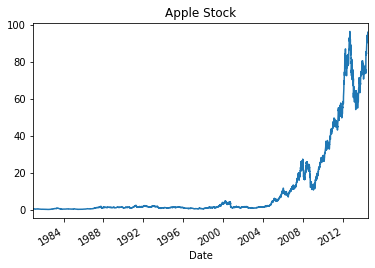

In [90]:
# 运行以下代码
# makes the plot and assign it to a variable
appl_open = apple['Adj Close'].plot(title = "Apple Stock")


# 探索Iris纸鸢花数据(删除数据)

In [91]:
path10 ='iris.csv'   # iris.csv

In [102]:
iris = pd.read_csv(path10,header=None)
iris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## 创建数据框的列名称

In [103]:
iris.columns=(['sepal_length','sepal_width', 'petal_length', 'petal_width', 'class'])

In [104]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## 数据框中有缺失值吗

In [109]:
iris.isnull().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
class           False
dtype: bool

## 将列petal_length的第10到19行设置为缺失值

In [113]:
iris.loc[10:20, 'petal_length'] = np.nan

In [114]:
iris.loc[10:20,:]

,sepal_length,sepal_width,petal_length,petal_width,class
10,5.4,3.7,NaN,0.2,Iris-setosa
11,4.8,3.4,NaN,0.2,Iris-setosa
12,4.8,3.0,NaN,0.1,Iris-setosa
13,4.3,3.0,NaN,0.1,Iris-setosa
14,5.8,4.0,NaN,0.2,Iris-setosa
15,5.7,4.4,NaN,0.4,Iris-setosa
16,5.4,3.9,NaN,0.4,Iris-setosa
17,5.1,3.5,NaN,0.3,Iris-setosa
18,5.7,3.8,NaN,0.3,Iris-setosa
19,5.1,3.8,NaN,0.3,Iris-setosa


## 将缺失值全部替换为1.0

In [116]:
iris = iris.fillna(1.0)

In [118]:
iris.head(20)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


## 删除列class

In [119]:
iris.drop('class',inplace=True,axis=1)

In [120]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## 将数据框前三行设置为缺失值

In [122]:
iris.iloc[0:3, :] = np.nan
iris

,sepal_length,sepal_width,petal_length,petal_width
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## 删除有缺失值的行

In [125]:
iris.dropna(axis=0, inplace=True)

In [126]:
iris

,sepal_length,sepal_width,petal_length,petal_width
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## 重新设置索引

In [135]:
iris.reset_index(inplace=True, drop=True)
iris

,sepal_length,sepal_width,petal_length,petal_width
0,4.6,3.1,1.5,0.2
1,5.0,3.6,1.4,0.2
2,5.4,3.9,1.7,0.4
3,4.6,3.4,1.4,0.3
4,5.0,3.4,1.5,0.2
...,...,...,...,...
142,6.7,3.0,5.2,2.3
143,6.3,2.5,5.0,1.9
144,6.5,3.0,5.2,2.0
145,6.2,3.4,5.4,2.3
